# Lab 9
Use SOMs to investigate the face dataset

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom

In [2]:
#load and normalize data

fea = pd.read_csv('faces_fea.csv',header=None)
fea/=fea.max().max()


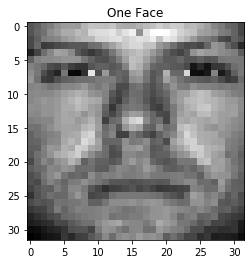

In [3]:
#plot a face

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
one_face = np.reshape(np.asarray(fea.iloc[0,:]),(faceH,faceW)).T

plt.imshow(one_face,cmap='gray')
plt.title('One Face')
plt.show()

In [4]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 3
ny = 3

#make, initialize, and train the SOM
data = fea.get_values()
som = MiniSom(nx, ny, 32**2, sigma=1, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 500) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  import sys


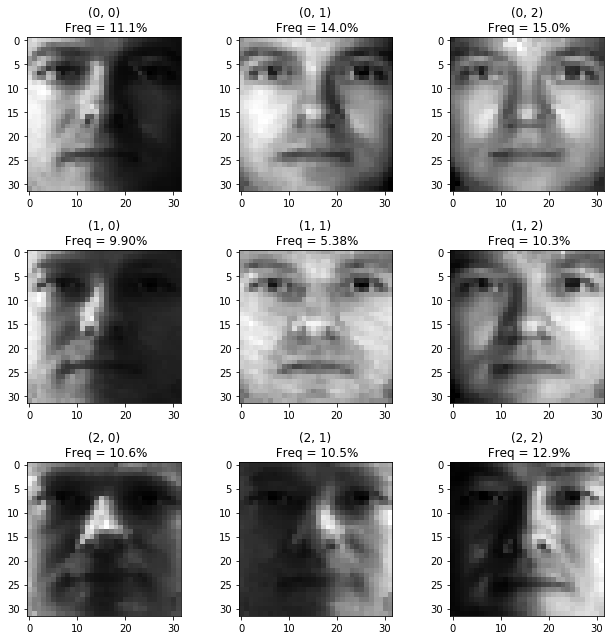

In [5]:
#visualize

plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.imshow(np.reshape(bmu_patterns[indx][indy],(faceH,faceW)).T,cmap='gray')
    plt.title(str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%')
    
plt.tight_layout()

In [8]:
#now, loop through and create a range of sizes of SOMs and compare TE and QE 

ny_array = [3,4,5,4,5,5]
nx_array = [3,3,3,4,4,5]

QE = []
TE = []
for kk in range(len(ny_array)):
    nx = nx_array[kk]
    ny = ny_array[kk]
    
    #make, initialize, and train the SOM
    data = fea.get_values()
    som = MiniSom(nx, ny, 32**2, sigma=1, learning_rate=0.5) # initialization of SOM
    som.pca_weights_init(data)
    som.train_random(data, 500) # trains the SOM with 100 iterations

    qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
    bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
    QE.append(som.quantization_error(data)) #quantization error of map
    TE.append(som.topographic_error(data)) #topographic error of map


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  del sys.path[0]


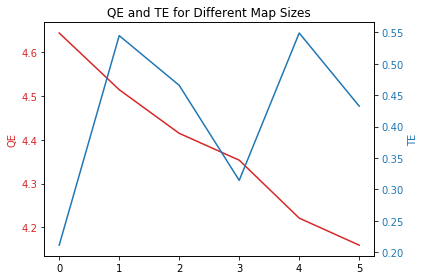

In [9]:
#visualize QE and TE (two different y axes)

fig, ax1= plt.subplots()

#QE
color = 'tab:red'
ax1.set_ylabel('QE',color=color)
ax1.plot(QE,color=color)
ax1.tick_params(axis='y',labelcolor=color)

#TE
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('TE',color=color)
ax2.plot(TE,color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('QE and TE for Different Map Sizes')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()